# Tarea 4: Iván Andrés Arellano


En este archivo se buscara, una acción que la distribución de sus rendimientos no pertenezca a una familia de las normales 

In [1]:
from yahoofinancials import YahooFinancials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download AMZN
ticker = "HOMEX"
yahoo_financials = YahooFinancials(ticker)
data = yahoo_financials.get_historical_price_data("2010-01-01", "2020-01-01", "daily")
df = pd.DataFrame(data[ticker]["prices"])

 

data=pd.DataFrame(df.adjclose)

<AxesSubplot:>

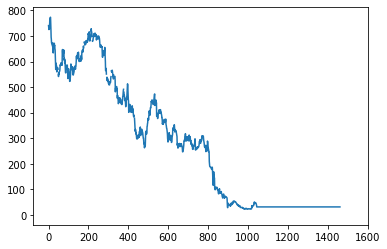

In [2]:
data.adjclose.plot()

<AxesSubplot:>

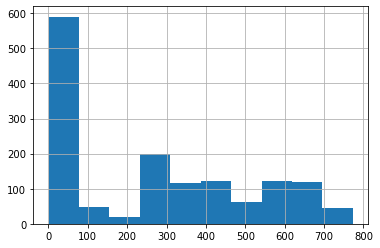

In [3]:
plt.show()
data.adjclose.hist()

In [4]:
data["R"]=data.adjclose.pct_change()
data["r"]=np.log(data.adjclose)-np.log(data.adjclose.shift(1))


<AxesSubplot:>

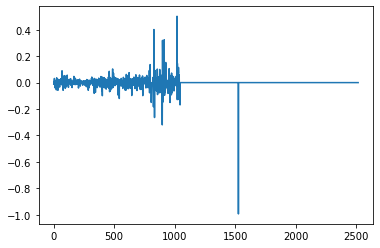

In [5]:
data.R.plot()

<AxesSubplot:>

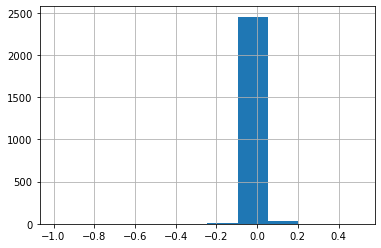

In [6]:
data.R.hist()

<AxesSubplot:>

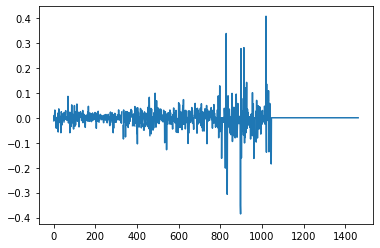

In [7]:
data.r.plot()

<AxesSubplot:>

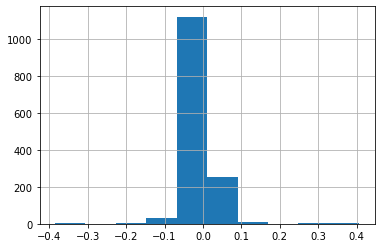

In [8]:
data.r.hist()

In [9]:
def dqr(data):
    cols= pd.DataFrame(list(data.columns.values),columns=['Name'],index=list(data.columns.values))
    dtyp= pd.DataFrame(data.dtypes,columns=['Type'])

    misval = pd.DataFrame(data.isnull().sum(),columns=['N/A value'])

    presval = pd.DataFrame(data.count(),columns=['Count values'])

    unival = pd.DataFrame(columns=['Unique values'])

    minval = pd.DataFrame(columns=['Min'])

    maxval = pd.DataFrame(columns=['Max'])

    mean=pd.DataFrame(data.mean(), columns=['Mean'])

    Std =pd.DataFrame(data.std(), columns=['Std'])

    Var =pd.DataFrame(data.var(), columns=['Var'])

    median =pd.DataFrame(data.median(), columns=['Median'])

    skewness = pd.DataFrame(data.skew(), columns=['Skewness'])

    kurtosis = pd.DataFrame(data.kurtosis(), columns=['Kurtosis']) 
    for col in list(data.columns.values):

        unival.loc[col] = [data[col].nunique()]

        try:

            minval.loc[col] = [data[col].min()]

            maxval.loc[col] = [data[col].max()]

        except:

            pass

    # Juntar todas las tablas

    return cols.join(dtyp).join(misval).join(presval).join(unival).join(minval).join(maxval).join(mean).join(Std).join(Var).join(median).join(skewness).join(kurtosis)

RECORTE =dqr(data)
RECORTE

,Name,Type,N/A value,Count values,Unique values,Min,Max,Mean,Std,Var,Median,Skewness,Kurtosis
adjclose,adjclose,float64,1072,1444,884,0.209000,773.200012,269.750768,236.452280,55909.680848,269.050003,0.435052,-1.229053
R,R,float64,1,2515,989,-0.993365,0.502058,-0.001258,0.034577,0.001196,0.000000,-7.680399,308.368723
r,r,float64,1088,1428,974,-0.385284,0.406836,-0.002200,0.036957,0.001366,0.000000,0.058704,39.055882


In [10]:
from scipy import stats
data=data.dropna()
'T-test, para probar medias'
alfa= 0.05
#Ho: son igual
#Ha: No son iguales
 
t, p = stats.ttest_ind(data.r, data.R, equal_var=True)
 
if p<alfa:
    print('Ho puede ser rechazada (NO SON IGUALES)')
else:
    print('Ho NO puede ser rechazada (SON IGUALES)')
# como p value es mayor a alpha, Ho no puede ser rechazada

Ho NO puede ser rechazada (SON IGUALES)


In [11]:
'T-test, para probar varianzas'
alfa= 0.05
#Ho: son igual
#Ha: No son iguales
 
t, p = stats.levene(data.r, data.R)
 
if p<alfa:
    print('Ho puede ser rechazada (NO SON IGUALES)')
else:
    print('Ho NO puede ser rechazada (SON IGUALES)')
# como p value es mayor a alpha, Ho no puede ser rechazada

Ho NO puede ser rechazada (SON IGUALES)


In [12]:
k3, p3 = stats.normaltest(data.r)
if p3 < alfa:
    print("Ho puede ser rechazada, No es normal") 
else:
    print("Ho NO puede ser rechazada, es normal")

Ho puede ser rechazada, No es normal


In [13]:
print("Mean R")
print(data.R.mean())
print("Mean r")
print(data.r.mean())
print("Left")
print(data.R.mean()-0.5*data.R.var())
print("Right")
print(data.r.mean())
print("Difference")
print("diference:",data.R.mean()-0.5*data.R.var()-data.r.mean())

Mean R
-0.0015131047011886546
Mean r
-0.0022002358258121565
Left
-0.0022176337735440536
Right
-0.0022002358258121565
Difference
diference: -1.7397947731897026e-05


,sumsquare_error,aic,bic,kl_div
gennorm,121.022253,406.646087,-3502.591454,inf
burr,1416.332448,2045.781568,17.340642,inf
lognorm,2005.721763,3373.090801,506.925264,inf
norm,2006.632896,3371.000468,500.309780,inf
beta,2007.966501,3363.706022,515.786572,inf


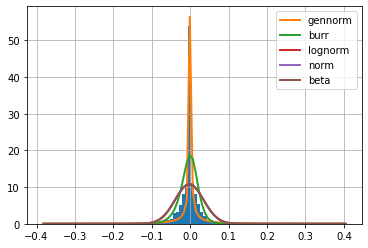

In [14]:
from fitter import Fitter ,get_common_distributions, get_distributions
dist= ['gamma','lognorm', "beta", "burr", "norm", "gennorm"]

fitr = Fitter(data.r, distributions=dist)
fitr.fit()
fitr.summary()

,sumsquare_error,aic,bic,kl_div
gennorm,512.431141,919.555177,-1441.713416,inf
burr,1572.997726,1648.771563,167.155593,inf
lognorm,1849.399129,3632.649378,391.052795,inf
beta,1854.503082,3691.111880,402.252376,inf
norm,1867.434894,4137.666205,397.647481,inf


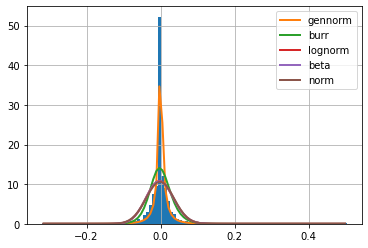

In [16]:
#dist=get_common_distributions()  #get_distributions()
 

f = Fitter(data.iloc[:,1],distributions=dist)
 
f.fit()
 
f.summary()

In [17]:
# Corriedno todas las dist 


from fitter import Fitter ,get_common_distributions, get_distributions
# Descomentar estas lineas
#import fitter
#f = fitter.Fitter(data)
#f.distributions

fitr = Fitter(data.r, #f.distributions=dist)
fitr.fit()
fitr.summary()